# EXAM INFO284 - 2023 SPRING
Candidates: 157, 138, 276

# Table of contents
1. [Task 1 - Mushroom Classification](#task1)  
    1.1 [Data set](#t1dataset)  
    1.2 [Imports](#task1imports)  
    1.3 [Preparing Data](#task1pdata)  
    1.4 [The Models](#task1models)  
    1.5 [Feature Selection](#task1feature)  
    1.6 [Results](#task1results)  
2. [Task 2 - Sentiment Analysis](#task2)  
    2.1 [Data set](#assign2dataset)  
    2.2 [Data Analysis](#assign2dataanalysis)  
    2.3 [Vectorizer](#assign2vectorizer)  
    2.4 [Data Visualization](#assign2datavis)  
    2.5 [Classifier](#assign2classifier)  
    2.6 [Resampling](#assign2resampling)  
    2.7 [Result Discussion](#assign2result)  
3. [Task 3 - Convolutional Neural Network (CNN)](#task3)  
    3.1 [Loading and Preprocessing CIFAR-10](#CIFAR-10)  
    3.2 [CNN LeNet-5 Inspired Architecture](#CNN)  
    3.3 [Train Function](#trainfunction)  
    3.4 [Compute Accuracy](#computeaccuracy)  
    3.5 [Compute Prediction](#computeprediction)  
    3.6 [Confusion Matrix](#CM)  
    3.7 [Dataloaders](#DL)  
    3.8 [Running the train function](#runtrain)  
    3.9 [Results](#results)  
   3.10 [Clasification of a new independent picture of Airplane](#newimgs)  

# Task 1 - Mushroom classification <a name='task1'></a>
In this task we are making three classification models on the Mushroom dataset, we have decided on using KNN, RandomForestClassifier and BernoulliNB. We will use these models to predict whether the mushroom is edible or not based on these features. 


## 1.1 The Data-set <a name='t1dataset'></a>

The dataset contains information about different mushrooms and their edibility. It consists of over 8122 instances, which are the mushrooms, and 22 features that represents a characteristic of the mushrooms, like odor, cap shape, gill size and more.
 
Before we start building the classification models, we will be exploring the dataset, get an understanding of what it contains, then clean the data and prepare the data for modeling.


## 1.2 Imports <a name='task1imports'></a>

We import the modules and libaries that will be used. 
Panda is good at handeling large data.

We are also using the sklearn liberary for all classification and is easy to use when implementing various machine learning algorithms. In this task we mainly use sklearn because it gives us a wide range of classifiers that we wish to use on our dataset. While the liberary also gives us tools, like LabelEncoder, to prepare the data, We will also be using it when evaluating the performance of these classifing models. 

In [22]:
import pandas as pd # Pandas provides a wide range of tools, makes it easy to explore and visulize data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.exceptions import DataConversionWarning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DataConversionWarning)

## 1.3 Preparing data <a name='task1pdata'></a>

In [23]:
#reading the csv mushroom dataset
mushroom = pd.read_csv('agaricus-lepiota.csv')
df= pd.DataFrame(mushroom)
mushroom.head()

,e,x,s,y,t,a,f,c,b,k,...,s.2,w,w.1,p,w.2,o,p.1,n,n.1,g
0,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
1,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [3]:
#labeling the columns
labels = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruised', 'odor',
'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring','veil_type', 'veil_color', 'ring_number',
'ring-type', 'spore_print_color', 'population', 'habitat']


df.columns = labels
mushroom.head()


,class,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
1,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [4]:
#encoding the categorical data, giving each category an unique numerical value
labelencoder = LabelEncoder()

for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

mushroom.head()  

,class,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
1,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
2,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3


In [5]:
#no null/missing values in the dataset
df.isna().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruised                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring-type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [24]:
#Number of mushrooms, number of features
print(mushroom.shape) 

(8122, 23)


0    4207
1    3915
Name: class, dtype: int64


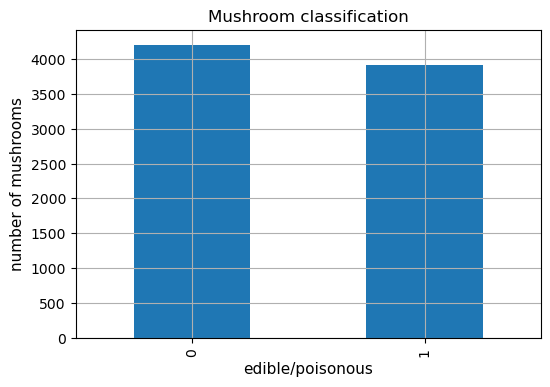

In [6]:
#using plt to visulize
count = mushroom['class'].value_counts()
print(count)

plt.figure(figsize=(6,4))
count.plot(kind='bar')
plt.grid(True)
plt.xlabel('edible/poisonous', fontsize = 11)
plt.ylabel('number of mushrooms', fontsize = 11)
plt.title('Mushroom classification')

plt.show()

Dropping the feature veil_type because it only gave us one value - a constant feature, that would not help the prediciton. 

In [7]:
#making set without the feature class as x
x= df.loc[:, df.columns != 'class']
x.head()

,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring-type,spore_print_color,population,habitat
0,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
1,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
2,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
3,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
4,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,2,3


In [8]:
#the y will be the feature class - that we should predict
y = df['class'].to_frame()
y.head()

,class
0,0
1,1
2,0
3,0
4,0


In [9]:
#spliting the data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=56)

In [10]:
print(X_train.shape)
print(y_train.shape)

(6497, 22)
(6497, 1)


In [11]:
print(X_test.shape)
print(y_test.shape)

(1625, 22)
(1625, 1)


## 1.4 The Models <a name='task1models'></a>

1.  KNN

We now use the KNeighborsClassifier to classify the edbility of the mushrooms 

In [12]:
#importing first model from Sklearn
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=30)

In [14]:
print('KNN accuracy: ', knn.score(X_test, y_test))

KNN accuracy:  0.9870769230769231


To evaluate the performance of our model we will use the kFold cross-validation technique. Mainly to avoid overfitting by training an testing the model on different subsets of the data. 

In [15]:
from sklearn.model_selection import KFold, cross_val_score

folds = KFold(n_splits= 5)
scores = cross_val_score(knn, x, y.values.ravel(), cv = folds)
print('Accuracy of each fold: ', scores)
print('The mean score result: ', scores.mean())

Accuracy of each fold:  [0.50338462 0.99692308 0.9729064  0.81465517 0.86453202]
The mean score result:  0.8304802576733611


As we can see after using the KFold method, the first fold gives us worse estimate than the rest of the folds, 
there could be multiple reasons for that. The first fold could be containing data that is significantly different than the rest of the folds, or the model being too complex and overfitting. 

2. RandomForest

Finding the important features of this data set could help to reduse the dimentions of the dataset. To do this we will use the RandomForestClassification. 

In [16]:
#importing the next model to use, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

|    | feature                  |   feature_importance |
|---:|:-------------------------|---------------------:|
|  0 | cap_shape                |           0.00394178 |
|  1 | cap_surface              |           0.00883719 |
|  2 | cap_color                |           0.0148778  |
|  3 | bruised                  |           0.0457215  |
|  4 | odor                     |           0.155601   |
|  5 | gill_attachment          |           0.00305538 |
|  6 | gill_spacing             |           0.0430563  |
|  7 | gill_size                |           0.098159   |
|  8 | gill_color               |           0.125678   |
|  9 | stalk_shape              |           0.0290234  |
| 10 | stalk_root               |           0.0582473  |
| 11 | stalk_surface_above_ring |           0.0391352  |
| 12 | stalk_surface_below_ring |           0.0341897  |
| 13 | stalk_color_above_ring   |           0.0179334  |
| 14 | stalk_color_below_ring   |           0.0178915  |
| 15 | veil_type               

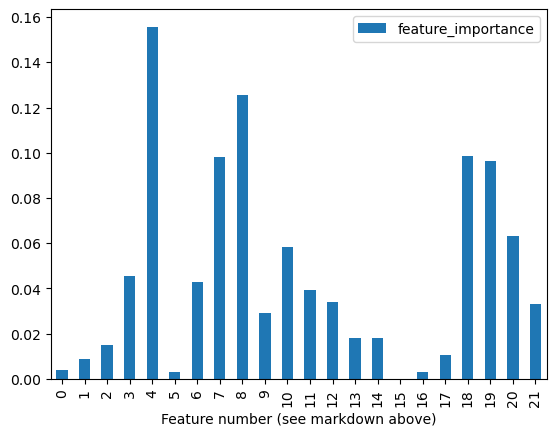

In [17]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

#Finding the important feature 
feature_importance = pd.DataFrame(
    {'feature': list(X_train.columns),
     'feature_importance': [abs(i) for i in RF.feature_importances_]}  
)

#printing the overview markdown 
print(feature_importance.to_markdown())

#and as a diagram
feature_importance.plot(kind = 'bar')
plt.xlabel('Feature number (see markdown above)')
plt.show()

The inspiration to find important features and use them in this way, we got from this site: towardsdatascience.com, by Giovanni Valdata: https://towardsdatascience.com/feature-importance-to-predict-mushrooms-edibility-in-python-5aa133fea3f8, 14.09. 22, read: 10.04.23

We are also using RF to classify the mushrooms. By using all the features we can find the accuracy in identifing the mushrooms edibility with RandomForest.

In [18]:
print('RandomForest Accuracy: ', RF.score(X_test, y_test))

RandomForest Accuracy:  1.0


We see that the accuracy is 100% 

3. BernoulliNB

BernoulliNB is another classification model that we will use to classify the mushrooms because this is a binary classification. It works well with binary data and can handle large number of features and high-dimentional datasets, like we have in the mushroomset.  

In [19]:
#importing BernoulliNB classification that we will use next
from sklearn.naive_bayes import BernoulliNB

In [20]:
model = BernoulliNB(alpha=0.2)
model.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=0.2)

In [21]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       853
           1       0.89      0.73      0.80       772

    accuracy                           0.83      1625
   macro avg       0.84      0.83      0.83      1625
weighted avg       0.84      0.83      0.83      1625



In [22]:
print('BernoulliNB accuracy: ', accuracy_score(y_test, pred))

BernoulliNB accuracy:  0.8307692307692308


Even though this model pretty is accurate, the BernoulliNB classifier may not be as effective as the two other models we have used. This model assumes, among other factors, that the features are independent of eachother, this might not be the case for the dataset we are working with. Where the odor and spore print may be correlated with each other and with the target variable, ignoring this could give us the litle reduced accuracy we are seeing. 

## 1.5 Feature Selection <a name='task1feature'></a>

Now we also use feature selection at last, only the most important features for the model, this could also reduse overfitting. We test it on our two best performing models, knn and RF.  

In [23]:
#making new variables for the new data to be used, mostly for the visability we also make a new y
x2 = df[['odor', 'gill_size', 'gill_color', 'spore_print_color']]
y2 = df['class']

#splitting again - with way less features as x
X2_train, X2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.2, random_state=56)

RF.fit(X2_train, y2_train)
knn.fit(X2_train, y2_train)
pred_RF = RF.predict(X2_test)


print('Report for the RF prediction: \n', classification_report(y2_test, pred_RF))

#printing the score accuracy for both to compare 
print('RandomForestClassifier score: ', RF.score(X2_test, y2_test))
print('Knn score: ', knn.score(X2_test, y2_test))

Report for the RF prediction: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       853
           1       0.98      1.00      0.99       772

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

RandomForestClassifier score:  0.9926153846153846
Knn score:  0.9926153846153846


Using only the important features also gives us aboutthe same accuracy as using all of the features in the dataset on the RandomForest model. The KNearestNeighbour got a litle better accuracy now, with only these features included. 

## 1.6 Results <a name='task1results'></a>

Based on the outcome of the different models used in this task, we would trust the RandomForest model to predict which mushrooms to eat. 
It has the abilty to identify the important features and give us an good accuracy score based on these features. It is also good to use on high-dimensional datasets like the mushroom dataset. This is where KNN is not as goood compared, because the large number of categories makes it difficult to find the best neighbours. Another factor could be that the Knn is prone to overfitting because it dont have enough data to generalize well. 

The RandomForest classifier can also handle non-linear and high-dimentional datasets like this one well. 
KNN has some limitations when it comes to the imbalanced data, more edible instances than poisonous in one class, where Random Forest adjusts the wheights of the samples and handles this better. 

# Task 2  <a name='task2'></a>  

The goal of this assignment is to create a model that can perform sentiment analysis. To achieve this we'll be training it on the provided dataset, containing sentiments classfied as positive, neutral, or negative.

**Required Imports/Downloads**

In [24]:
%pip install spacy imblearn nltk numpy pandas wordcloud
!python -m spacy download nb_core_news_sm

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 12.5/12.5 MB 4.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('nb_core_news_sm')


In [25]:
import spacy
import re
import json
import nltk
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import BorderlineSMOTE
from wordcloud import WordCloud


nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jakoa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2.1 Data set <a name='assign2dataset'><a/>

The data set is provided as a set of three JSON files containing separate training, testing, and validation sets. We begin by loading all three files into a `data` variable.

As the text in the data set is Norwegian, we begin by loading the set of Norwegian stop words and the spaCy natural language processing pipeline for Norwegian Bokmål.

In [26]:
data = {}
stops = stopwords.words('norwegian')
nlp = spacy.load('nb_core_news_sm')

In [27]:
for name in ["train", "dev", "test"]:
    with open("{0}.json".format(name)) as infile:
        data[name] = json.load(infile)

Next we load the train and test data into dataframes, and separate input text from labels.

In [28]:
train = pd.DataFrame.from_dict(data["train"])
test = pd.DataFrame.from_dict(data["test"])
# train
# test

In [29]:
X_train_raw = train['text']
y_train = train['label']

X_test_raw = test['text']
y_test = test['label']

# X_train_raw

### 2.2 Data analysis <a name='assign2dataanalysis'><a/>

We begin by analyzing the training and test datasets. As shown by `value_counts`, the majority of samples in both datasets are classified as neutral. The training dataset contains a total of approx. 8000 samples, while test contains 1200.

Additionally we can display 10 random samples to understand the format of the input.

In [30]:
train.value_counts('label')

label
Neutral     4079
Positive    2624
Negative    1270
dtype: int64

In [31]:
test.value_counts('label')

label
Neutral     598
Positive    401
Negative    182
dtype: int64

In [32]:
train.sample(n=10)

,sent_id,text,label
2823,703730-03-02,Diktene hans utgjør i tillegg tekstene .,Neutral
6807,102095-03-01,Maria Mena Norwegian Wood Publikum :,Neutral
882,101014-01-02,Tullmannens læregutt,Negative
5000,200607-11-01,Les :,Neutral
5557,101562-01-01,Filmanmeldelse :,Neutral
6423,106155-06-02,Normalt ville jeg kanskje startet med å fortel...,Positive
478,501037-06-02,Det er det eneste som ville fungert for Tor En...,Negative
825,002618-07-01,"De fine tilløpene til tross , Ghost Stories er...",Negative
7498,702603-04-03,Fra første referanse tilHollywood-folkloren on...,Negative
6928,700338-08-03,Regissøren må ha tryllet rikelig digitalt for ...,Positive


### 2.2 Data processing <a name='assign2dataprocess'><a/>  
  
Since we cannot go straight from raw text to fitting a model to the data we need to clean up the text first. Splitting the text into words, handling punctuation and lower casing everything. The function in the next cell cleans up the data, taking into account norwegian characters, removing special characters, removes all single characters, removes inconsistent spacing, and lemmatizes the text. The if-statements are for debug and data visualization purposes.     

Step by step of what the function does:
**Original: "Med integrerte høyttalere som på ingen måte er diskret plassert   og med en stor subwoofer inkludert   da snakker vi om en gutteskjerm"**  
  
`re.sub(r'\s+[a-zA-ZæøåÆØÅ]\s+', ' ', document)` Removes single characters, and `re.sub(r'\^[a-zA-ZæøåÆØÅ]\s+', ' ', document)` removes single characters at the start of a sentiment.  

**Removed single characters: "Med integrerte høyttalere som på ingen måte er diskret plassert   og med en stor subwoofer inkludert   da snakker vi om en gutteskjerm"**  

`re.sub(r'\s+', ' ', document, flags=re.I)` is used to remove inconsistent spacing, replacing it with a single space instead. `document.lower()` is just a built in python function to make text lowercase.

**Lowercase: "med integrerte høyttalere som på ingen måte er diskret plassert og med en stor subwoofer inkludert da snakker vi om en gutteskjerm"**  

Finally the text is lemmatized using `document = nlp(document)`.

**Lemmatized**: `['med', 'integrert', 'høyttal', 'som', 'på', 'ingen', 'måte', 'være', 'diskre', 'plassere', 'og', 'med', 'en', 'stor', 'subwoof', 'inkludere', 'da', 'snakke', 'vi', 'om', 'en', 'gutteskjerm']`

In [33]:
stemmer = nlp.get_pipe('lemmatizer')

def clean_text(X: list[str], n_to_print=0):
    documents = []
    for sen in range(0, len(X)):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(X[sen]))

        #if len(documents) < n_to_print:
        #    print('Original:', document)

        # remove all single characters
        document = re.sub(r'\s+[a-zA-ZæøåÆØÅ]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-ZæøåÆØÅ]\s+', ' ', document)

        #if len(documents) < n_to_print:
        #    print('Removed single characters:', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Converting to Lowercase
        document = document.lower()

        #if len(documents) < n_to_print:
        #    print('Lowercase:', document)

        # Lemmatization
        document = nlp(document)

        document = [word.lemma_ for word in document]

        #if len(documents) < n_to_print:
        #    print('Lemmatized:', document)
        document = ' '.join(document)

        documents.append(document)
    return documents

### 2.3 Vectorizer <a name='assign2vectorizer'><a/> 
  
The Vectorizer we've chosen for this task is the TfidVectorizer. The vectorizer converts data to a matrix of said TD-IDF features. It's equivelant to doing a `CountVectorizer` followed by `TfidfTransformer`. The vectorizer is where we grab the stopwords for use in the model.  
  
The point of using tf-idf instead of raw-frequencies is to reduce the impact very frequent words and increase the impact of words that occur less frequently. For example, this is different to how a Bag of Words implementation functions as it just creates vectors with the count of each occurance of a word.

In [34]:
# Vectorizer defined here, as well as stopwords being implemented into the the vectorizer.
vectorizer = TfidfVectorizer(stop_words=stops, ngram_range=(1,2))
# Tfid stands for "Term Frequence-inverse Document Frequency".

In [35]:
X_train_lemmas = clean_text(X_train_raw, 2)
X_test_lemmas = clean_text(X_test_raw)

X_train = vectorizer.fit_transform(X_train_lemmas).toarray()
X_test = vectorizer.transform(X_test_lemmas).toarray()

### 2.4 Data visualization <a name='assign2datavis'></a>
Now that the data has been vectorized, we can see below that it produces a large array of mostly 0, as expected. To visualize some of the words and their frequency in the data-set post processing we can use a wordcloud to illustrate the most frequently used words. 

In [36]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

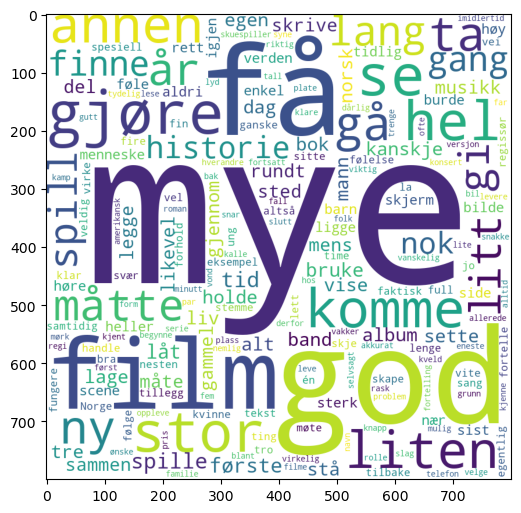

In [37]:
X_train_wc = []

for i in X_train_lemmas:
    for k in i.split():
        if k not in stops:
            X_train_wc.append(k)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                # stopwords = stopwords,
                min_font_size = 10).generate((' '.join(X_train_wc)))

# print(X_train_wc)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.tight_layout(pad = 0)

plt.show()

Unfortunately this approach does not take into account the TFIDvectorized data or labels from the data set, and just bases it of of word frequency. Because of this, there is not much useful to see, but nonetheless there is some information we can get from it. "God" can conventionally be associated with a positive sentiment, but most of the other words in this wordcloud can be neutral, positive, or negative. 

### 2.5 Classifier  <a name='assign2classifier'></a>
  
For the classifier we've tried `SGDClassifier`, `MultinomialNB`, and `BernoulliNB`.  

In [38]:
classifierB = BernoulliNB()
classifierB.fit(X_train, y_train)
y_predB = classifierB.predict(X_test)
print(f'BernoulliNB: {accuracy_score(y_test, y_predB)}')

BernoulliNB: 0.5097375105842507


In [39]:
classifierM = MultinomialNB()
classifierM.fit(X_train, y_train)
y_predM = classifierM.predict(X_test)
print(f'MultinomialNB: {accuracy_score(y_test, y_predM)}')

MultinomialNB: 0.56731583403895


In [40]:
classifier = SGDClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [41]:
print(f'Non-rescaled: {accuracy_score(y_test, y_pred)}')

Non-rescaled: 0.6333615580016935


In [42]:
print(confusion_matrix(y_test, y_pred))

[[ 38  81  63]
 [ 30 448 120]
 [ 27 112 262]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.40      0.21      0.27       182
     Neutral       0.70      0.75      0.72       598
    Positive       0.59      0.65      0.62       401

    accuracy                           0.63      1181
   macro avg       0.56      0.54      0.54      1181
weighted avg       0.62      0.63      0.62      1181



As you can see by the results both `MultinomialNB`, and `BernoulliNB` produced quite poor results so we went with `SGDClassifier` as it produced the best overall result of the three. However the result are bad, but expected given the provided data set we have to use for the assignment. 

### 2.6 Resampling  <a name='assign2resampling'></a>

For this data-set .63 accuracy is to be expected, but still quite bad. In an attempt to remedy this we tried resampling the data-set using `BorderlineSMOTE`. This algorithm generates additional samples similar to those present in the data set, providing additional samples to under-represented classes. In this data set it creates significantly more negative and positive data-points for the classifier to work with. This can however reduce accuracy as it essentially fills the data set with filler data, which can make it more difficult for the model to be trained.

In [44]:
resampler = BorderlineSMOTE(random_state=123)

X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)

Let's see how many values it has once resampled.

In [45]:
y_train_res.value_counts() # Rescaled

Neutral     4079
Negative    4079
Positive    4079
Name: label, dtype: int64

In [46]:
y_train.value_counts() # non-Rescaled

Neutral     4079
Positive    2624
Negative    1270
Name: label, dtype: int64

As you can see the difference in number of values quite significant. This makes for a very skewed data-set which is quite suboptimal for machine learning. A skewed data-set can lead to the model not identifying the correct sentiment making the training inneficcient.  

So let's feed it back into the classifier and see what accuracy it achives when the input-data is equalized. We don't expect it to do much, as it's still roughly the same data, but it can interesting to look at the difference in the classification report.

In [47]:
classifier_res = SGDClassifier()
classifier_res.fit(X_train_res, y_train_res)
y_pred_res = classifier_res.predict(X_test)

In [48]:
print(f'Rescaled: {accuracy_score(y_test, y_pred_res)}')

Rescaled: 0.6121930567315834


In [49]:
print(confusion_matrix(y_test, y_pred_res))

[[ 52  71  59]
 [ 67 412 119]
 [ 40 102 259]]


In [50]:
print(classification_report(y_test, y_pred_res))

              precision    recall  f1-score   support

    Negative       0.33      0.29      0.30       182
     Neutral       0.70      0.69      0.70       598
    Positive       0.59      0.65      0.62       401

    accuracy                           0.61      1181
   macro avg       0.54      0.54      0.54      1181
weighted avg       0.61      0.61      0.61      1181



### 2.7 Results Discussion  <a name='assign2result'></a>

The results of this sentiment analysis are not great, 0.63 accuracy is practically a coinflip and is not practically useful, but is expected from the given data-set. In an attempt to improve the accuracy we rescaled the data-set to try and account for the skewed data-set, but still seeing quite bad results. The reason for this could be a poor choice of machine learning, but we think the main issue is that the skewed data-set doesn't give the model enough to go off of.

Analysing the classification reports we can glean some information about the model. In the first classification report the model has a negative recall of `.19`, meaning that out of `100` negative sentences, it would misclassify `81` of them. These numbers are slightly improved in the rescaled classifier, to `.29` negative recall. The numbers of neutral and positive recall are significantly higher, but similarly are also quite poor. For negative precision we see it scores `.45` meaning that for `55` of the sentences if the classifier says it's negative, it's wrong. In the rescaled classifier the negative precision actually goes down significantly to `.33`, meaning that for `67` of the sentences the classifier says is negative is wrong.

The main reason for this poor, but expected result is the severely skewed data-set as shown earlier. There are ~4000 neutral and ~2700 positive sentiments compared to only ~1200 negative sentiments. This leads to the model not being able to classify negative sentiments properly. Which is onviously not desirable when doing sentiment analysis. We think the approach to sentiment analysis outlined in this assignment would work on a better data set.

# Task 3 - Convolutional Neural Network (CNN) <a name='task3'></a>
The goal of this task is to train a CNN to predict if a picture contains a `Airplane` or `Not`. This is done by using the cifar-10 dataset.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime
from torchvision import datasets, transforms
from torch.utils.data import random_split
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import torch.nn.functional as F
from PIL import Image 
import torchvision.transforms as transforms 

torch.manual_seed(123)

## 3.1 Loading and preprocessing CIFAR-10<a name='CIFAR-10'></a>
This code loads and preprocess the CIFAR-10 dataset. creates training, validation, and test sets for a binary classification problem, whether an image contains an airplane or not. 
### Preprocessing
- ``transforms.ToTensor()``
    - Turns the input pictures to a PyTorch tensor
- ``transforms.Normalize``
    - Important for helping the model to learn fater by using mean and std values that are spesific for the CIFAR-10 datasett. 
- ``transforms.Compose()``
    - Makes sure that both preprocessing steps are being runed at the same time
    
### Loading
Both the ``cifar10_train_val``and ``cifar10_test``uses the PyTorch function ``datasets.CIFAR10()``to download the CIFAR-10 dateset and transformates the imgs using ``preprocessor``then stores the dataset into memory. The ``cifar10_train_val`` uses traning data while ``cifar10_test`` uses test data.

### Label
The ``label_map``makes turns the 10 labels into 2 categories ``Not`` or ``Airplane``. The ``label_map`` is then used in ``cifar2_train_val`` and ``cifar2_test`` so this dataset has binary labels instead of 10. ``cifar2_train_val``gets slpitted to ``n_train`` and ``n_val``. ``n_train`` takes 90% of the dataset and ``n_val`` takes the remaning 10%. The manual_seed(123) is for making the randomnes deterministic so it can be reproducible.

In [2]:
# Based on code from the pytorch tutorials from INF265 - Deep Learning

data_path = '../data/' #where the CIFAR-10 is located
preprocessor = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize #This is to normalize the RGB colors for the CIFAR-10 dataset.
    ((0.4915, 0.4823, 0.4468), #Mean values of RGB
    (0.2470, 0.2435, 0.2616))  #Standard deviation of RGB
        ])

cifar10_train_val = list(datasets.CIFAR10(data_path, train=True, download=True, transform=preprocessor))
cifar10_test = list(datasets.CIFAR10(data_path, train=False, download=True, transform=preprocessor))

label_map = {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
class_names = ['Not', 'Airplane']


cifar2_train_val = [(img, label_map[label]) for img, label in cifar10_train_val]
cifar2_test = [(img, label_map[label]) for img, label in cifar10_test]



n_train = int(len(cifar2_train_val)*0.90)
n_val =  len(cifar2_train_val) - n_train
cifar2_train, cifar2_val = random_split(
        cifar2_train_val, 
        [n_train, n_val],
        generator=torch.Generator().manual_seed(123)
)


100%|████████████████████████| 170498071/170498071 [00:19<00:00, 8575104.35it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data/
Files already downloaded and verified


## 3.2 CNN LeNet-5 inspired architecture<a name='CNN'></a>
### Structure
- ``conv1`` is the first convolution layer it has 3 ``in_channels`` that is the RGB-colors, this gets turned into 6 ``out_channels``. The filtersize/``kernel_size`` is 5, ``stride`` = 1 this means that the filter jumps 1 column each step. there are no padding used in this model. the output of this layer can be calculated by using this formula $(Input−Kernel+2Padding)/Stirde+1$ and then multiply this by number of ``out_channels`` in this case 6. In this senario it would be
$(32-5+0)/1+1 = 28 $ then times 6.

- ``act1``is using ReLU function (Rectified Linear Unit) which changes all negative numbers to 0 while the positive numbers dosen't get changed.

- ``pool1`` task is to extract the most important information/patterns from the conv layer and reducing the dimension of the tensor. 

- ``flat`` converts the dimension of the tensor to 1D so it can have the right dimension for pushing it through the fully connected layers ``fc1`` ``fc2`` `fc3`.

- The `forward` function determine the order of the journey from input to output. As you can se in `fc3` the `out_features` = 2 which represents the `Not` and `Airplane` labels.


In [3]:
class MyCNN(nn.Module):
    def __init__(self):
        super().__init__()  # to inherit the '__init__' method from the 'nn.Module' class
        # Some conventions:
        # - conv stands for convolution
        # - pool for pooling
        # - fc for fully connected
        # based on Lenet-5

        # 32*32*3: determined by our dataset: 32x32 RGB images
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride = 1, padding = 0)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0)
        
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0)
        
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = 5, stride = 1, padding = 0)
        
        self.flat = nn.Flatten()
        
        self.fc1 = nn.Linear(in_features = 120 , out_features = 84) # 5 is height 8 is width and 120 is nr channels.
        self.fc2 = nn.Linear(in_features = 84 , out_features = 10)
        self.fc3 = nn.Linear(in_features = 10 , out_features = 2) #C + 5 components
         
        
             

    def forward(self, x):
        out = self.act1(self.conv1(x))
        out = self.pool1(out)
        out = self.act1(self.conv2(out))
        out = self.pool2(out)
        out = self.act1(self.conv3(out))
        out = self.flat(out)
        out = self.act1(self.fc1(out))
        out = self.act1(self.fc2(out))
        out = self.fc3(out)
        
        return out

## 3.3 Train function<a name='trainfunction'></a>
The train function trains the model (`MyCNN`) using the following paarameters:
- `n_epochs` number of epochst that the model is getting trained. 
- `optimizer` adjust a model's weights with the goal of tuning them so they minimize the value of loss function, this is done by using Stochastic gradient descent (SGD)
- `loss_fn` gives feedback on how well the predicted outputs is to the true labels. Lower values means better predictions.
- `train_loader` this is the datasett used for traing the model.

The `train`function returns the `losses_train` which is caluculated by taking the loss values of the predictions compared to the true labels `loss_train`. Since it gets computed in batches and added together we have to devide the total loss number by number of batches.


In [4]:
def train(n_epochs, optimizer, model, loss_fn, train_loader):
    
    n_batch = len(train_loader)
    
    # Stores the training loss for each epoch
    losses_train = []
    
    # Set the network in training mode
    model.train()
    
    # Re-initialize gradients, just in case the model has been inappropriately 
    # manipulated before the training
    optimizer.zero_grad(set_to_none=True)
    
    for epoch in range(1, n_epochs + 1): 
        
        # Training loss for the current epoch
        loss_train = 0

        # Loop over our dataset (in batches the data loader creates for us)
        for imgs, labels in train_loader:
            
            # Feed a batch into our model
            outputs = model(imgs)
            
            # Compute the loss we wish to minimize 
            loss = loss_fn(outputs, labels) 
            
            # Perform the backward step. That is, compute the gradients of all parameters we want the network to learn
            loss.backward()
            
            # Update the model
            optimizer.step() 
            
            # Zero out gradients before the next round (or the end of training)
            optimizer.zero_grad() 

            # Update loss for this epoch
            # It is important to transform the loss to a number with .item()
            loss_train += loss.item()
            
        # Store current epoch loss. 
        losses_train.append(loss_train / n_batch)
        

        if epoch == 1 or epoch % 10 == 0:
            print('{}  |  Epoch {}  |  Training loss {:.3f}'.format(
                datetime.now().time(), epoch, loss_train / n_batch))
             
            
    return losses_train

## 3.4 Compute accuracy<a name='computeaccuracy'></a>
The `compute_accuracy()` computes the accuracy of how god the model predicts the labels of a given datasett.

This is done by a `for` loop where `torch.no_grad()` helps the computation go faster by not calculating the gradients since the weight parameters are not being updated. 

`_, predicted = torch.max(outputs, dim=1)` stores the indices of the highest outputvalue between the 2 outputs `Airplane` and `Not`. 



In [21]:
def compute_accuracy(model, loader):
    model.eval()
    correct = 0 # The correct predictions is calculated by adding 1 for each time the predicted 
                #index values is the same as the true label.
    total = 0

    with torch.no_grad():
        for imgs, labels in loader: 

            outputs = model(imgs)
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]  # The count of total imgs is done by adding the sum of all the batch sizes.
            correct += int((predicted == labels).sum())

    acc =  correct / total # Accuracy is computed by dividing correct predictions to the total number of imgs.
    print("Accuracy: {:.2f}".format(acc))
    return acc

## 3.5 Compute Prediction<a name='computeprediction'></a>
The `compute_prediction()` defines a function that takes a trained model and a data loader as input arguments. The purpose of this function is to compute the model's predictions on the provided data, output the softmax probabilities for each class so how shure the model is. Then it prints the final predicted class labels.

This function is build on the `compute_accuracy()` function so `model.eval()` and `torch.no_grad()` has the same purpose here. whats different in the prediction function is that it only focus on what the model (My_CNN) predicts, and not what the true labels are. `imgs.view(-1, 3, 32, 32)` reshapes the images dimension.

The output scores are converted to softmax probabilities using `F.softmax(outputs, dim=1)`. 
These softmax predictions gets printed out by turning the the valus into NumPy.
`torch.max()` gets the highest softmax probability

## 3.6 Confusion Matrix<a name='CM'></a>

Makes a matrix to find out if a prediction is ether the following: true positive, false positive, false negative, true negative. It also calculates the accuracy of the predictions.

In [6]:
def compute_prediction(model, loader):
    model.eval() 

    with torch.no_grad():
        for data in loader:
            if len(data) == 2:
                imgs, labels = data
            else:
                imgs = data[0]
            
                
            imgs = imgs.float() # The `imgs.float()` turns makes it possible for the tensors to have desimal numbers. 
            imgs = imgs.view(-1, 3, 32, 32) # -1 is the place for batch size, 3 is for the RGB-colours.
                                            #`32, 32` is the pixel size respetivly width, height.
                

            outputs = model(imgs) # the `outputs` processes the imgs in the model
                                  # and produces outputs score between the two parameters `Not` and `Airplane`. 
            
            softmax_probs = F.softmax(outputs, dim=1) # The softmax function normalizes the scores to produce probability values in the range `[0,1]`
            softmax_probs_np = softmax_probs.numpy()  # which sum to 1 across the two labels `Airplane` and `Not`.
            print("Softmax probabilities: [{:.2f}, {:.2f}]".format(softmax_probs_np[0, 0], softmax_probs_np[0, 1]))
            
            _, predicted = torch.max(outputs, dim=1)
    print("Not =","[0]", "Airplane =","[1]")
    return print("Predicted:", predicted.numpy())

In [7]:
def confusion_matrix(model, loader):
    model.eval()
    num_classes = 2
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    with torch.no_grad():
        for imgs, labels in loader:
            outputs = model(imgs)
            _, predicted = torch.max(outputs, dim=1)
            
            for i in range(len(labels)):
                true_label = labels[i]
                pred_label = predicted[i]
                matrix[true_label, pred_label] += 1

    print("Confusion Matrix:")
    print("[True Positive, False Positive]")
    print("[False Negative, True Negative]")
    print(matrix)
    
    acc = np.trace(matrix) / np.sum(matrix)
    print("Accuracy: {:.2f}".format(acc))
    return matrix

## 3.7 Dataloaders<a name='DL'></a>
Using Pytorch's `Dataloader` function. The point of doing so is for loading and batching the datasets for traing, validation and testing. This function also let the `train_loader` be shuffeled for minimizing that the model looks for the wrong patterns. This is not needed for `val_loader` and `test_loader` since the model is then trained and the model is evaluated on the whole dataset.

In [8]:
train_loader = torch.utils.data.DataLoader(cifar2_train, batch_size=200, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=200, shuffle=False)
test_loader = torch.utils.data.DataLoader(cifar2_test, batch_size=200, shuffle=False)

## 3.8 Running the `train` function<a name='runtrain'></a>

Here the the model `MyCNN` gets trained using `train`.
- `seed(123)`is used for reproducibility
- `model_MyCNN` stores the weights that gets tuned in `MyCNN()`.
- The loss function uses `CrossEntropyLoss()` to find the loss value for how much the weights should be tuned.
- The `optimizer` uses a Stochastic gradient descent (SGD) to update the weight and bias parameters. it has a learing rate of 0.03, this tells how much its possible for weights to be changed for each round.
- The traing of `MyCNN` has 20 epochs and uses `train_loader`

Ass you can see the loss values goes down for each epoch. This is a good thing and means that the weights gets better tuned towards predicting the true labels from the `train_loader`.


In [11]:
torch.manual_seed(123)
model_MyCNN = MyCNN()
loss_fn = nn.CrossEntropyLoss()


optimizer = optim.SGD(model_MyCNN.parameters(), lr=0.03)

loss_train = train(20, optimizer, model_MyCNN, loss_fn, train_loader)
loss_train

20:07:20.008552  |  Epoch 1  |  Training loss 0.350
20:07:59.092650  |  Epoch 10  |  Training loss 0.214
20:08:45.291952  |  Epoch 20  |  Training loss 0.169


[0.3495679709646437,
 0.2778579315212038,
 0.2628097973267237,
 0.2539185044500563,
 0.24332306808895535,
 0.23492653124862248,
 0.22852352970176273,
 0.22257583061854044,
 0.21868766327699027,
 0.2144341611199909,
 0.21022162483798132,
 0.2040265169739723,
 0.19766395893361832,
 0.19479556411504745,
 0.18775889303949145,
 0.184784477353096,
 0.17911783960130478,
 0.17509594132502873,
 0.17285149448447756,
 0.1693012143174807]

## 3.9 Results<a name='results'></a>
The accuracy of the model is respectivly 94% on `train_loader`, 93% on `val_loader` and 93% on `test_loader`. I think this is some fairly good results, but i have to mentin that the datasets has a favor of pictures that are not Airplane in fact `Airplane` is $1/10$ of the imgs while $9/10$ is `Not`. The results of confusion matrix is following: $8823$ true positive, $177$ false positive, $488$ false negative, $512$ true negative.

In [12]:
compute_accuracy(model_MyCNN, train_loader)

Accuracy: 0.94


0.9400444444444445

In [13]:
compute_accuracy(model_MyCNN, val_loader)

Accuracy: 0.93


0.9348

In [14]:
compute_accuracy(model_MyCNN, test_loader)

Accuracy: 0.93


0.9335

In [15]:
cm_test = confusion_matrix(model_MyCNN, test_loader)

Confusion Matrix:
[True Positive, False Positive]
[False Negative, True Negative]
[[8823  177]
 [ 488  512]]
Accuracy: 0.93


## 3.10 Clasification of a new independent picture of `Airplane`<a name='newimgs'></a>

- `resize()` reshapes the dimensions, `transforms.ToTensor()` turns the img to PyTorch tensor, `transforms.Compose()` makes sure that both transformations gets done.
- At the end transformed img is saved in `img_tensor` an then a extra dimension is added `img_tensor.unsqueeze(0)` 


In `compute_prediction()` of `plane2.jpg` the model predicts the right label `Airplane`. The `Softmax` shows that the model predicts `Airplane` with 56% certanty. For large and complext image recognition models it would be expected to have higher confidence in `softmax predictions`. One way that could help make the `Softmax` prediction better, is to shrink the number of the imgs labeled `Not` the same size as all `Airplane` labeled imgs so the dataset is 50/50 of the two labels.


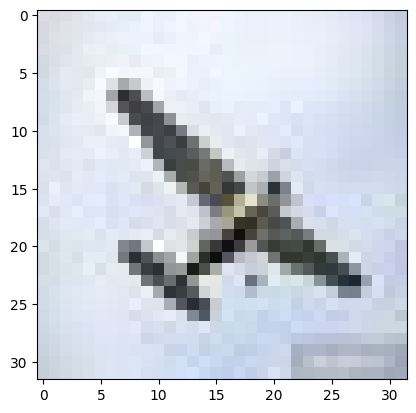

In [16]:
# The img `plane2.jpg`gets visulized
img=mpimg.imread('plane2.jpg')
imgplot = plt.imshow(img)

image = Image.open('plane2.jpg') # The img gets opened using PIL libary and transformed so the tensor dimension can be interpreted by the model.

transform = transforms.Compose([
    transforms.Resize((32, 32)), #Transforms the airplane picture to the right dimension size 32*32
    transforms.ToTensor()       # The same pixel size as pictures in cifar10
])                              # Then the picture gets converted to tensor
                                # This reconstruction of the original img gives the following resulting shape: `(1,3,32,32)`

img_tensor = transform(image)  #Making airplane.jpg go through "transform"

# Add an extra dimension for the batch size (1 in this case)
img_tensor = img_tensor.unsqueeze(0)

In [17]:
compute_prediction(model_MyCNN, [(img_tensor,)])

Softmax probabilities: [0.44, 0.56]
Not = [0] Airplane = [1]
Predicted: [1]
